In [ ]:
coderhouse
Primera preentrega del Proyecto Final
Comisión 60920
Jefferson Andrés Salas Ramírez
COSTA RICA, 2024


¿Cuál es el género de juego más popular según Steam?

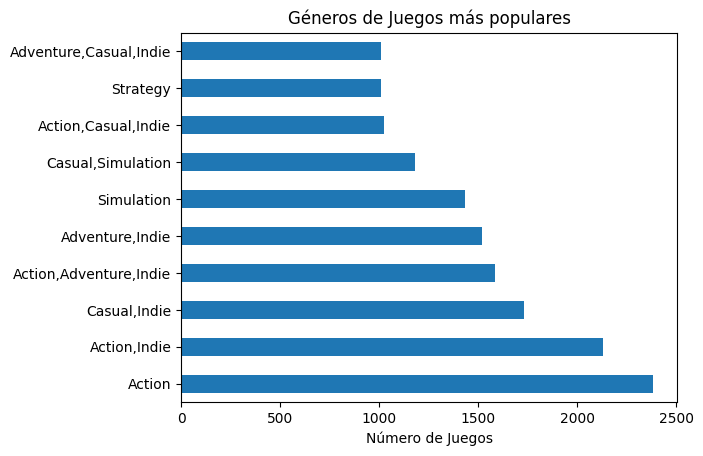

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('steam_games.csv')

top_developers = df['genre'].value_counts().head(10)
top_developers.plot(kind='barh')
plt.xlabel('Número de Juegos')
plt.title('Géneros de Juegos más populares')
plt.show()

Conclusión: El género más popular según Steam es el de acción.


¿Cuál es el desarrollador de videojuegos con más juegos según Steam?

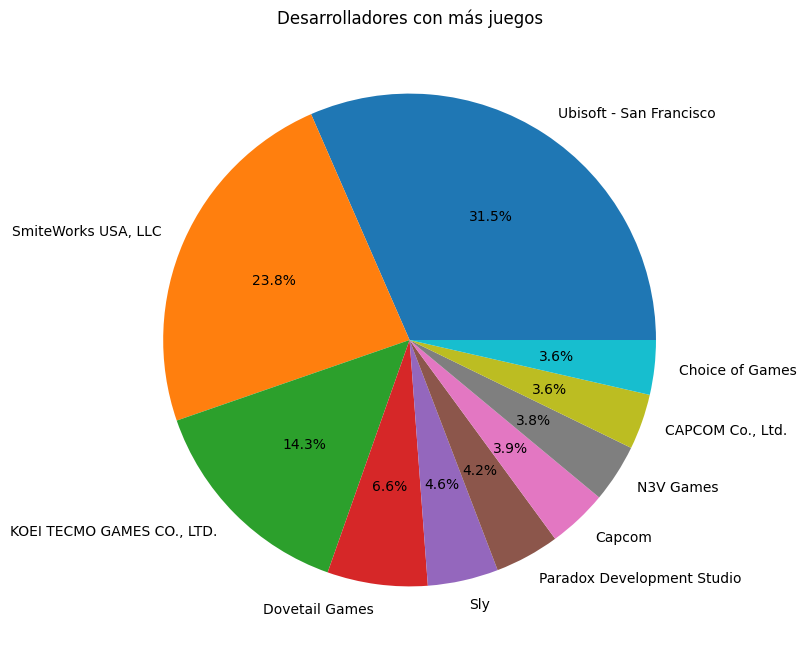

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('steam_games.csv')
developer_counts = df['developer'].value_counts().head(10)
plt.figure(figsize=(8, 8))
plt.pie(developer_counts, labels=developer_counts.index, autopct='%1.1f%%')
plt.title('Desarrolladores con más juegos')
plt.show()

conclucion :la desarroladora con mas juegos es ubisoft

¿Cuál es el idioma más presente en los videojuegos?

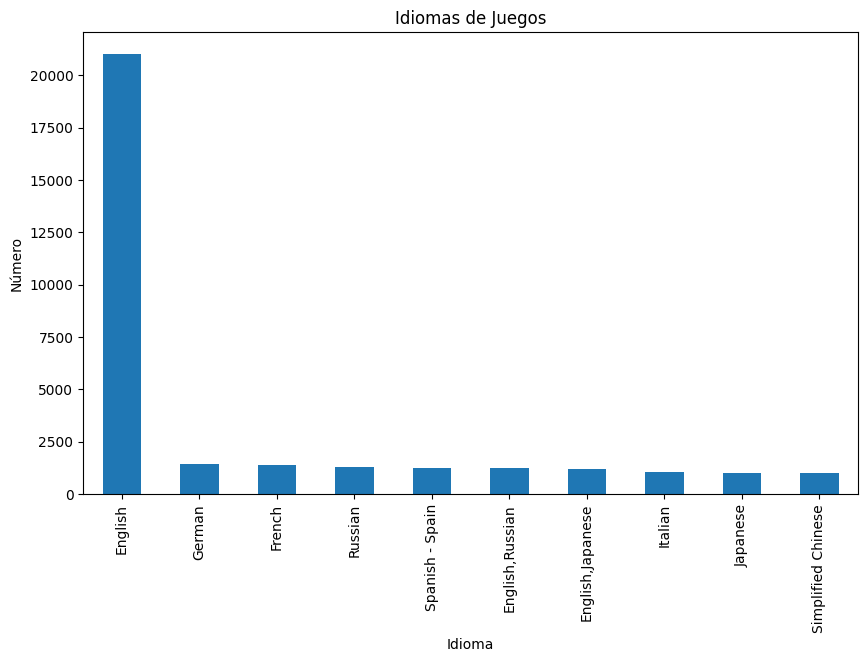

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('steam_games.csv')

language_counts = df['languages'].str.split(', ').explode().value_counts().head(10)
plt.figure(figsize=(10, 6))
language_counts.plot(kind='bar')
plt.xlabel('Idioma')
plt.ylabel('Número')
plt.title('Idiomas de Juegos')
plt.show()

Conclusión: El idioma más presente en los videojuegos es el inglés.

¿Cuál es el precio más común de los videojuegos?

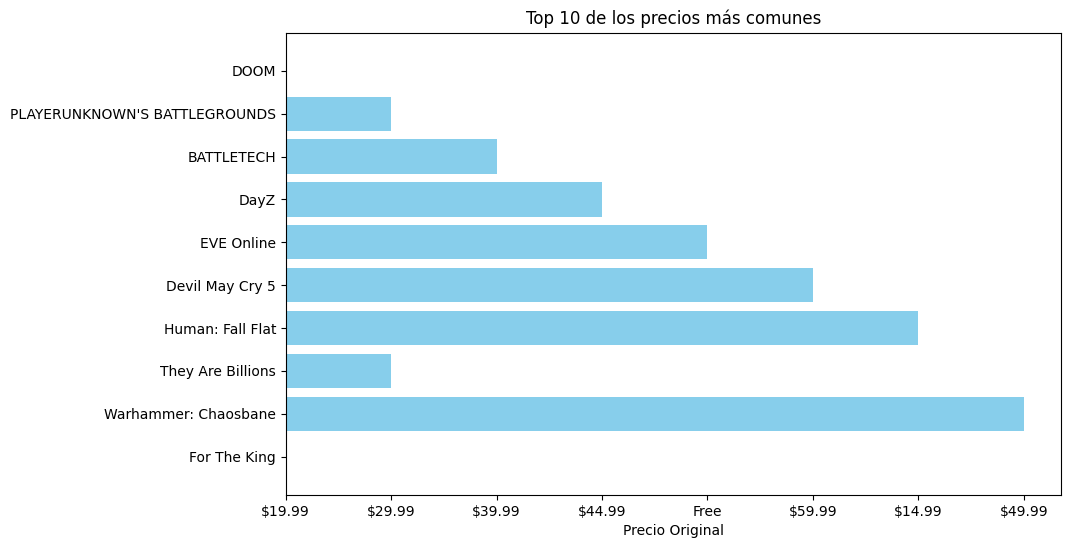

In [3]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('steam_games.csv')


df = df.dropna(subset=['original_price'])


game_prices = df[['name', 'original_price']].head(10)

plt.figure(figsize=(10, 6))
plt.barh(game_prices['name'], game_prices['original_price'], color='skyblue')
plt.xlabel('Precio Original')
plt.title('Top 10 de los precios más comunes')
plt.gca().invert_yaxis() 
plt.show()


El precio más común es de 49 dólares.

¿Cuáles son las etiquetas más populares?

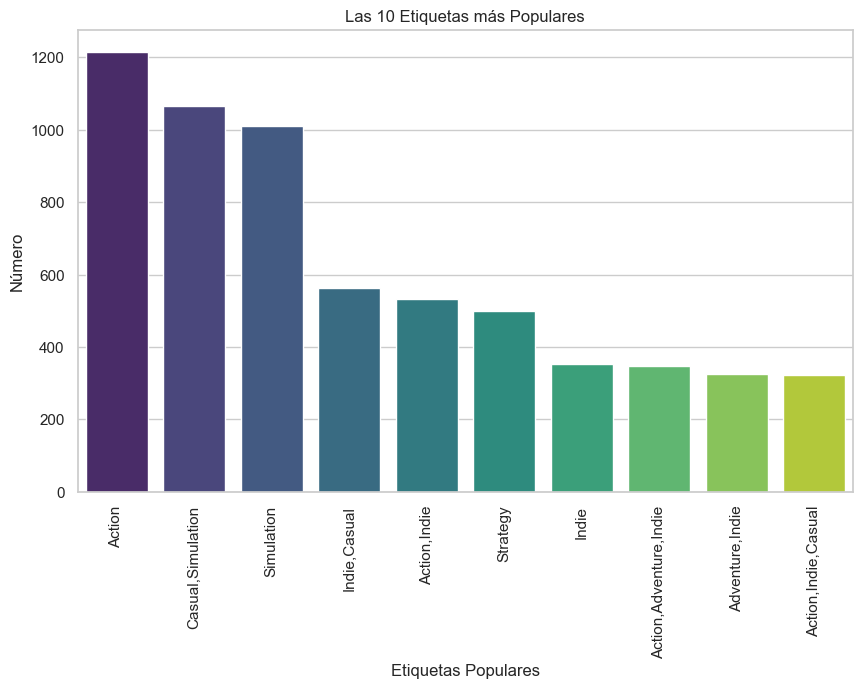

In [3]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



df = pd.read_csv('steam_games.csv')

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='popular_tags', order=df['popular_tags'].value_counts().head(10).index, palette='viridis')
plt.xlabel('Etiquetas Populares')
plt.ylabel('Número')
plt.title('Las 10 Etiquetas más Populares')
plt.xticks(rotation=90)
plt.show()

La etiqueta más popular es la de acción.

¿Cuál es el estilo más popular en los videojuegos?

) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jeffe\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


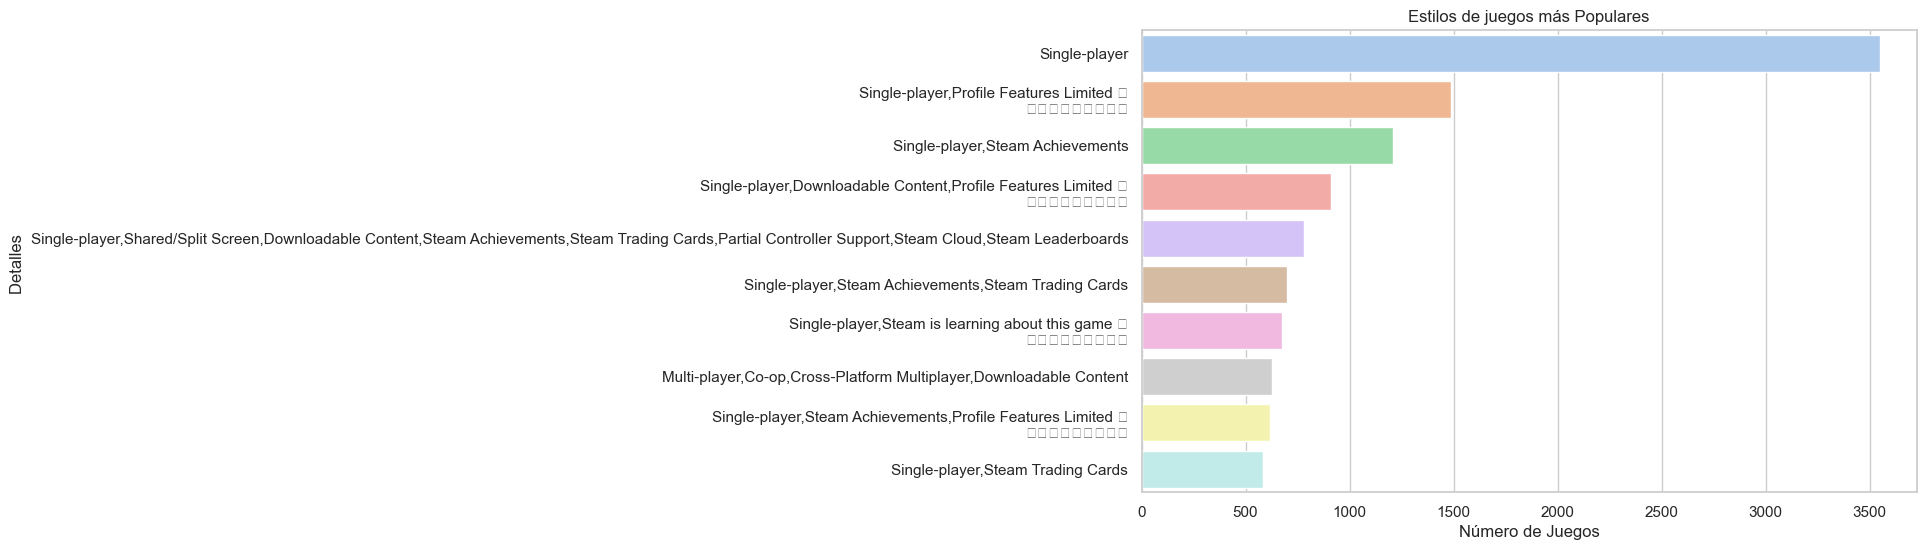

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('steam_games.csv')
game_details_counts = df['game_details'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid") 
sns.barplot(x=game_details_counts.values, y=game_details_counts.index, palette='pastel')
plt.xlabel('Número de Juegos')
plt.ylabel('Detalles ')
plt.title('Estilos de juegos más Populares')
plt.show()


El estilo más popular es el de un jugador.

coderhouse
Proyecto Final
Comisión 60920
Jefferson Andrés Salas Ramírez
COSTA RICA, 2024

Reducción de la dimensionalidad del dataset

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import pandas as pd


df = pd.read_csv('steam_games.csv')


string_columns = df.select_dtypes(include=['object']).columns


X = df.drop(columns=string_columns)


pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')), 
    ('pca', PCA(n_components=1))  
])


X_processed = pipeline.fit_transform(X)


print("Datos reducidos después de PCA y la imputación de valores faltantes:")
print(pd.DataFrame(X_processed, columns=['Componente Principal 1']))

Datos reducidos después de PCA y la imputación de valores faltantes:
       Componente Principal 1
0               -2.323749e+01
1               -4.023749e+01
2                5.076251e+01
3                1.421085e-14
4                1.421085e-14
...                       ...
40828            1.421085e-14
40829            1.421085e-14
40830            1.421085e-14
40831            1.421085e-14
40832            1.421085e-14

[40833 rows x 1 columns]


In [ ]:
Algoritmo de Regresión

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
import numpy as np
import re


df = pd.read_csv('steam_games.csv')


numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()


df[numeric_columns] = df[numeric_columns].replace({'[^\d.]': ''}, regex=True).astype(float)


numeric_imputer = SimpleImputer(strategy='mean')
df[numeric_columns] = numeric_imputer.fit_transform(df[numeric_columns])


text_columns = df.select_dtypes(exclude=[np.number]).columns.tolist()
df[text_columns] = df[text_columns].fillna('')


df['Sentimiento'] = df['all_reviews'].str.contains('Positive', case=False)

X = df.drop(columns=['Sentimiento', 'all_reviews']) 
y = df['Sentimiento'] 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = CountVectorizer()
X_train_desc = vectorizer.fit_transform(X_train['desc_snippet'].astype(str))  
X_test_desc = vectorizer.transform(X_test['desc_snippet'].astype(str))  


model = LogisticRegression(max_iter=1000) 
model.fit(X_train_desc, y_train)


predictions = model.predict(X_test_desc)


precision = accuracy_score(y_test, predictions)
print("Precisión del modelo:", precision)


print("\nInforme de clasificación:")
print(classification_report(y_test, predictions))


Precisión del modelo: 0.6874005142647239

Informe de clasificación:
              precision    recall  f1-score   support

       False       0.70      0.79      0.74      4672
        True       0.66      0.55      0.60      3495

    accuracy                           0.69      8167
   macro avg       0.68      0.67      0.67      8167
weighted avg       0.68      0.69      0.68      8167



In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


precision = precision_score(y_test, predictions, average='weighted')


recall = recall_score(y_test, predictions, average='weighted')


f1 = f1_score(y_test, predictions, average='weighted')


weighted_accuracy = accuracy_score(y_test, predictions)


print("Precisión del modelo (weighted):", precision)
print("Recuperación del modelo (weighted):", recall)
print("Puntuación F1 del modelo (weighted):", f1)
print("Precisión ponderada del modelo:", weighted_accuracy)

Precisión del modelo (weighted): 0.6846358514962174
Recuperación del modelo (weighted): 0.6874005142647239
Puntuación F1 del modelo (weighted): 0.6819254716332066
Precisión ponderada del modelo: 0.6874005142647239


Rendimiento del modelo: El modelo exhibe un rendimiento moderado en la tarea de clasificar el sentimiento de las reseñas de juegos, con una precisión ponderada del 68·46%·
métricas ponderadas: Las métricas ponderadas como la precisión, la recuperación y la puntuación F1 ponderada son esenciales para evaluar el desempeño global del modelo.
Posible necesidad de ajustes: Los resultados del modelo pueden señalar áreas que necesiten ajustes o mejoras·  técnicas de preprocesamiento para mejorar su capacidad predictiva·
Validación y evaluación continua: Los modelos de aprendizaje automático son dinámicos y su rendimiento puede cambiar con el tiempo o los cambios en los datos de entrada·